In [1]:
from deploy import load



ckpt_path = "/home/roborobo/Downloads/See-you-need-to-see/deploy/ckpt/fam/fam_model.bin"
model = load(ckpt_path, type="fam")


2024-04-25 15:01:04.031158: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-25 15:01:04.533684: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565


_IncompatibleKeys(missing_keys=['image_encoder.image_encoder.pos_embed', 'image_encoder.image_encoder.patch_embed.proj.weight', 'image_encoder.image_encoder.patch_embed.proj.bias', 'image_encoder.image_encoder.blocks.0.norm1.weight', 'image_encoder.image_encoder.blocks.0.norm1.bias', 'image_encoder.image_encoder.blocks.0.attn.rel_pos_h', 'image_encoder.image_encoder.blocks.0.attn.rel_pos_w', 'image_encoder.image_encoder.blocks.0.attn.qkv.qkv.weight', 'image_encoder.image_encoder.blocks.0.attn.qkv.qkv.bias', 'image_encoder.image_encoder.blocks.0.attn.proj.weight', 'image_encoder.image_encoder.blocks.0.attn.proj.bias', 'image_encoder.image_encoder.blocks.0.norm2.weight', 'image_encoder.image_encoder.blocks.0.norm2.bias', 'image_encoder.image_encoder.blocks.0.mlp.lin1.weight', 'image_encoder.image_encoder.blocks.0.mlp.lin1.bias', 'image_encoder.image_encoder.blocks.0.mlp.lin2.weight', 'image_encoder.image_encoder.blocks.0.mlp.lin2.bias', 'image_encoder.image_encoder.blocks.1.norm1.weight'

In [25]:
model.model.pixel_std

tensor([[[0.2290]],

        [[0.2240]],

        [[0.2250]]], device='cuda:0', dtype=torch.float16)

In [26]:
from PIL import Image

image = Image.open("/home/roborobo/Downloads/See-you-need-to-see/Ego/Merge_EgoThink/1_Activity.jpg")
instruction = "What am I doing?"

result = model(image, instruction, threshold=0.5)

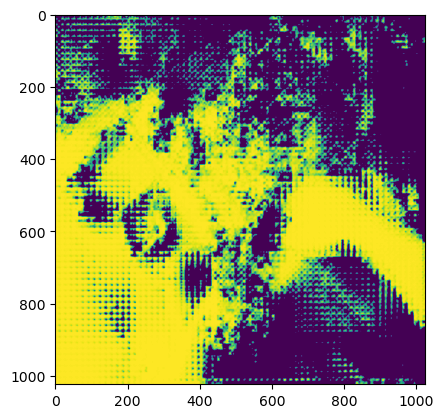

In [27]:
from matplotlib import pyplot as plt
plt.imshow(result['hard'])

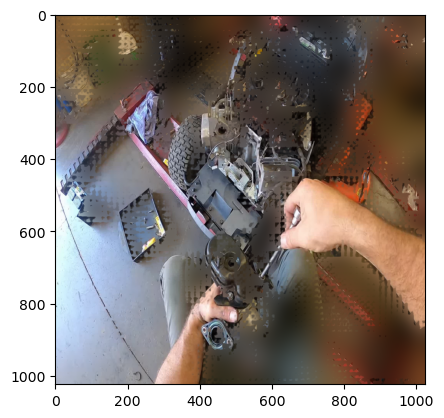

In [28]:
from matplotlib import pyplot as plt
import numpy as np
plt.imshow(result['blur_image'].astype(np.uint8))

In [16]:
from transformers import T5Tokenizer, T5EncoderModel
model_path = 'google/t5-v1_1-base'
T5Tokenizer.from_pretrained(pretrained_model_name_or_path=model_path)
T5EncoderModel.from_pretrained(model_path)

T5EncoderModel(
  (shared): Embedding(32128, 768)
  (encoder): T5Stack(
    (embed_tokens): Embedding(32128, 768)
    (block): ModuleList(
      (0): T5Block(
        (layer): ModuleList(
          (0): T5LayerSelfAttention(
            (SelfAttention): T5Attention(
              (q): Linear(in_features=768, out_features=768, bias=False)
              (k): Linear(in_features=768, out_features=768, bias=False)
              (v): Linear(in_features=768, out_features=768, bias=False)
              (o): Linear(in_features=768, out_features=768, bias=False)
              (relative_attention_bias): Embedding(32, 12)
            )
            (layer_norm): T5LayerNorm()
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (1): T5LayerFF(
            (DenseReluDense): T5DenseGatedActDense(
              (wi_0): Linear(in_features=768, out_features=2048, bias=False)
              (wi_1): Linear(in_features=768, out_features=2048, bias=False)
              (wo): Linear(in_f